# COGS 108 - Final Project 

# Table of Contents

[Overview](#overview)
<br>
[Question](#question)
<br>
└─[Background](#background)
<br>
└─ [Hypothesis](#hypothesis)
<br>
[Datasets](#datasets)
<br>
[Data Cleaning and Analysis](#data_cleaning_and_analysis)
<br>
└─[Inspection Score Prediction](#inspection_score_prediction)
<br>
└─[Violation Category Prediction](#violation_category_prediction)


<a id='overview'></a>

# Overview

There is a general idea in people who are not very familiar with Machine Learning and Artificial Intelligence that they can be used to solve all problems and will soon be displacing everyone from their jobs, as computers become able to do humans' work better than them. In this project I set out to disprove this idea, and show that there are some situations where Machine Learning will never be as good as a human. In order to do this, we will use restaurant health inspections, and attempt to predict inspection scores using nearby restaurants and some simple geographic and demographic information about the areas in which those restaurants are located.

# Name & GitHub

- Name: Michael Sorenson
- GitHub Username: michaelsorenson

<a id='question'></a>

# Research Question

Do restaurants have similar inspection scores to nearby restaurants? Can inspections score of restaurants be used to predict inspection scores of nearby restaurants? Can restaurant data and nearby restaurant data be used to predict types of violations?

<a id='background'></a>

## Background and Prior Work

Research has shown that dining-out habits among Americans have been steadily increasing in the past ten years$^{1}$, and in the past few decades (with the exception of recent COVID-19 trends)$^{2}$. With more people eating out at restaurants, it is becoming more important that restaurants meet general cleanliness and safety guidelines, and the primary way restaurants are kept in check is through health inspections. Inspections are done on restaurants in order to determine any ways in which restaurants are unsafe, or unhealthy, and help restaurants fix these violations. It is in a restaurants' interest to keep to code, as the state assigns the restaurant a score, which is used to give the restaurants a grade (A, B, C, etc.) which the restaurant can (and is required to) display so that prospective customers are assured that the restaurant is safe. This research project sets out to determine if Machine Learning can be used to predict inspection scores and types of violations a restaurant may make.

References (include links):
- 1) https://www.statista.com/statistics/237215/average-away-from-home-food-expenditures-of-united-states-households/
- 2) https://www.theatlantic.com/business/archive/2017/06/its-the-golden-age-of-restaurants-in-america/530955/

<a id='hypothesis'></a>

## Hypothesis


Restaurants near each other geographically will have similar inspection scores, but not close enough to warrant using nearby restaurants as a proxy for inspection scores; other variables such as average income for a zip code may also be used to help predict inspection scores, but not enough to get perfect or even great accuracy. 

<a id='datasets'></a>

# Datasets

---
- Dataset Name: Inspections
- Link to the dataset: inspections.csv
- Number of observations: 18466

Contains inspections of different restaurants, reporting a score between 0-100 for how well that restaurant passed inspection, also reporting the number of critical violations and number of non critical violations. Also reports the last inspections statistics on critical and non critical violations.

---
- Dataset Name: Violations
- Link to the dataset: violations.csv
- Number of observations: 189802

Contains violations of different restaurants, including a short description of the violation, whether or not the violation is critical, and the category of the violation.

---
- Dataset Name: Zip Codes
- Link to the dataset: zipcodes.csv
- Number of observations: 38

Contains economic and demographic data on zip codes, as well as other geographic data that describes a zip code.

---
- Dataset Name: Restaurants
- Link to the dataset: restaurants.csv
- Number of observations: 3324

Contains geographic data on restaurants that contains longitude and latitude, as well as zip code and city/state.

---
In order to combine datasets, the inspections, violations, and restaurants datasets contain an `hsisid` value that can easily be used to connect restaurants. Additionally, each restaurant in the restaurants dataset has an associated zip code which can be used to connect it to the zip codes dataset

# Setup

In [715]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='data_cleaning_and_analysis'></a>

# Data Cleaning, Data Analysis & Results

In [716]:
insp_df = pd.read_csv('data/inspections.csv')
viol_df = pd.read_csv('data/violations.csv')
yelp_df = pd.read_csv('data/yelp.csv')
zip_df = pd.read_csv('data/zipcodes.csv')
rest_df = pd.read_csv('data/restaurants.csv')

## Restaurant & Inspections Data
---
First we will try to merge the inspections and geographic restaurant data to get a DataFrame containing restaurant geographic information, and their most recent inspection score

---

In [717]:
insp_df.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [718]:
rest_df.head()

,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M


---
First, let's clean the zip codes so they are all 5 digit integers

---

In [719]:
insp_df['postalcode'] = insp_df['postalcode'].apply(lambda x: int(x[:5]))
rest_df['postalcode'] = rest_df['postalcode'].apply(lambda x: int(x[:5]))

---
Now let's merge inspection and restaurant geographic data, and only show the most recent inspection for each restaurant

---

In [720]:
data = (insp_df[['hsisid', 'postalcode', 'num_critical', 'num_non_critical', 'score', 'date']]
        .merge(rest_df[['hsisid', 'address1', 'x', 'y']], on='hsisid'))
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['date', 'hsisid']).drop_duplicates(subset='hsisid').reset_index(drop=True).dropna()
data

,hsisid,postalcode,num_critical,num_non_critical,score,date,address1,x,y
0,4092013748,27610,9,7,96.0,2012-09-21 00:00:00+00:00,3000 New Bern Ave,-78.587963,35.783914
1,4092014046,27610,0,11,98.0,2012-09-21 00:00:00+00:00,1030-149 N Rogers Ln,-78.549673,35.791986
2,4092015191,27610,4,8,97.0,2012-09-21 00:00:00+00:00,6209 ROCK QUARRY RD,-78.547960,35.723125
3,4092016122,27513,2,3,99.0,2012-09-21 00:00:00+00:00,1065 Darrington DR,-78.815727,35.799249
4,4092021513,27597,2,4,97.0,2012-09-21 00:00:00+00:00,841 E Gannon AVE,-78.296347,35.831285
...,...,...,...,...,...,...,...,...,...
3040,4092017300,27560,3,1,97.0,2016-10-26 00:00:00+00:00,4023 Davis DR,-78.857016,35.838150
3041,4092017343,27587,1,3,99.0,2016-10-26 00:00:00+00:00,12401 WAKE UNION CHURCH RD,-78.539619,35.984189
3042,4092017285,27560,3,4,95.0,2016-10-28 00:00:00+00:00,10285 Chapel Hill RD,-78.827880,35.830126
3043,4092021984,27616,10,12,93.0,2016-10-31 00:00:00+00:00,5959-1100 TRIANGLE TOWN BLVD,-78.571592,35.865463


---
Now let's explore the columns to make sure they don't contain 0's or -1's meant to represent missing data

---

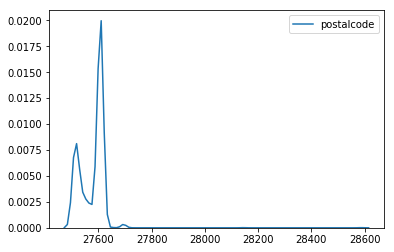

In [721]:
sns.kdeplot(data.postalcode)

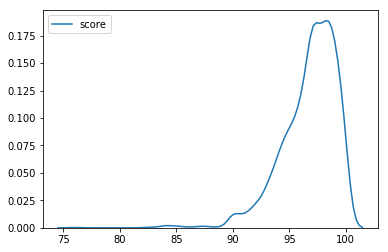

In [722]:
sns.kdeplot(data.score)

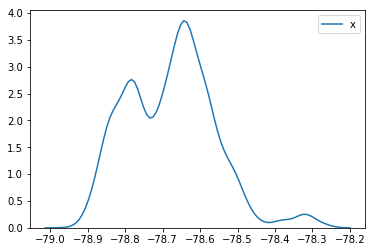

In [723]:
sns.kdeplot(data.x)

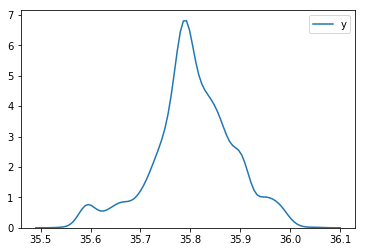

In [724]:
sns.kdeplot(data.y)

---
Hmmm, looks like the X and Y values are longitude and latitude, let's see if we can convert those to miles to make it easier to compare distance in terms of miles

---

In [725]:
data['x'] = data['x'].apply(lambda x: x * 69)
data['y'] = data['y'].apply(lambda x: x * 60)

---
Let's also subtract the minimum value so that the locations for x and y start at (0, 0)

---

In [726]:
data['x'] = data['x'] - data['x'].min()
data['y'] = data['y'] - data['y'].min()

In [727]:
data

,hsisid,postalcode,num_critical,num_non_critical,score,date,address1,x,y
0,4092013748,27610,9,7,96.0,2012-09-21 00:00:00+00:00,3000 New Bern Ave,24.427587,14.66184
1,4092014046,27610,0,11,98.0,2012-09-21 00:00:00+00:00,1030-149 N Rogers Ln,27.069597,15.14616
2,4092015191,27610,4,8,97.0,2012-09-21 00:00:00+00:00,6209 ROCK QUARRY RD,27.187794,11.01450
3,4092016122,27513,2,3,99.0,2012-09-21 00:00:00+00:00,1065 Darrington DR,8.711871,15.58194
4,4092021513,27597,2,4,97.0,2012-09-21 00:00:00+00:00,841 E Gannon AVE,44.549091,17.50410
...,...,...,...,...,...,...,...,...,...
3040,4092017300,27560,3,1,97.0,2016-10-26 00:00:00+00:00,4023 Davis DR,5.862930,17.91600
3041,4092017343,27587,1,3,99.0,2016-10-26 00:00:00+00:00,12401 WAKE UNION CHURCH RD,27.763323,26.67834
3042,4092017285,27560,3,4,95.0,2016-10-28 00:00:00+00:00,10285 Chapel Hill RD,7.873314,17.43456
3043,4092021984,27616,10,12,93.0,2016-10-31 00:00:00+00:00,5959-1100 TRIANGLE TOWN BLVD,25.557186,19.55478


---
Ok, now that we've got geographic data and scores, as well as critical and non-critical violations, let's explore how the geographic data and scores are distributed

---

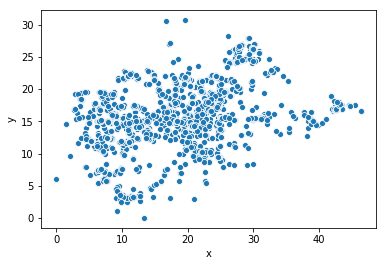

In [728]:
sns.scatterplot(data['x'], data['y'])

---
Above, each point represents a restaurant, with the x and y being the restaurant's coordinates
<br>
So, there's clearly a few outliers that are not close to other restaurants, so even if there is a correlation between geographic area and inspection score, KNN will probably do poorly on those

---

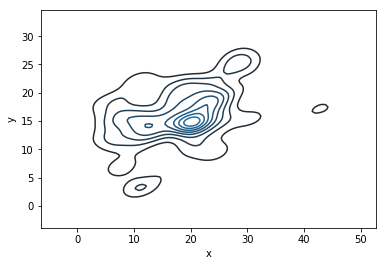

In [729]:
sns.kdeplot(data['x'], data['y'])

---
This plot shows density of restaurants, and if you compare it to the below map of Wade County (NC) below, you can see more developed areas, especially Raleigh (NC's capital) tend to have more restaurants

---

<img src="https://i.pinimg.com/originals/4c/97/d9/4c97d942a59757d69c712bd55ee31e3b.jpg" alt="Wade_County_Map" align="left" style="width: 400px;"/>

<br>
Source: https://www.pinterest.com/pin/434315957808167052/

<a id='inspection_score_prediction'></a>

---
## Inspection Score Prediction
Let's try to build a classifier using K nearest neighbors to classify health inspection score (KNN makes sense because this is geographical data, and directly answers the proposed question)

---

In [730]:
data

,hsisid,postalcode,num_critical,num_non_critical,score,date,address1,x,y
0,4092013748,27610,9,7,96.0,2012-09-21 00:00:00+00:00,3000 New Bern Ave,24.427587,14.66184
1,4092014046,27610,0,11,98.0,2012-09-21 00:00:00+00:00,1030-149 N Rogers Ln,27.069597,15.14616
2,4092015191,27610,4,8,97.0,2012-09-21 00:00:00+00:00,6209 ROCK QUARRY RD,27.187794,11.01450
3,4092016122,27513,2,3,99.0,2012-09-21 00:00:00+00:00,1065 Darrington DR,8.711871,15.58194
4,4092021513,27597,2,4,97.0,2012-09-21 00:00:00+00:00,841 E Gannon AVE,44.549091,17.50410
...,...,...,...,...,...,...,...,...,...
3040,4092017300,27560,3,1,97.0,2016-10-26 00:00:00+00:00,4023 Davis DR,5.862930,17.91600
3041,4092017343,27587,1,3,99.0,2016-10-26 00:00:00+00:00,12401 WAKE UNION CHURCH RD,27.763323,26.67834
3042,4092017285,27560,3,4,95.0,2016-10-28 00:00:00+00:00,10285 Chapel Hill RD,7.873314,17.43456
3043,4092021984,27616,10,12,93.0,2016-10-31 00:00:00+00:00,5959-1100 TRIANGLE TOWN BLVD,25.557186,19.55478


In [731]:
def has_rest_within_x_miles(x_miles, data):
    """
    Simple function to find which restaurants have another
    restaurant within x miles
    :param x: how many miles to check for another restaurant
    :return: boolean array that indicates restaurants in data that have a nearby restaurant
    """
    has_rest = []
    for i, row in data.iterrows():
        compdf = data[(data.index.to_series() != i).values]
        xdist = compdf['x'] - row['x']
        ydist = compdf['y'] - row['y']
        dist = pd.Series(np.sqrt(np.square(xdist) + np.square(ydist))).sort_values()
        nn = dist[dist <= x_miles]
        if len(nn) > 0:
            has_rest.append(True)
        else:
            has_rest.append(False)
    return has_rest

In [732]:
print(np.mean(has_rest_within_x_miles(1, data)))

0.9904761904761905


---
Interesting, so 99% of the restaurants have at least one restaurant within a mile

---

In [733]:
print(np.mean(has_rest_within_x_miles(5, data)))

1.0


---
Cool, and all the restaurants have at least one nearby restaurant within five miles. Let's try to visualize how many restaurants have at least 1 restaurant within x miles

---

In [734]:
X = np.arange(0, 5, 0.2)
y = []
for x in X:
    y.append(np.mean(has_rest_within_x_miles(x, data)))

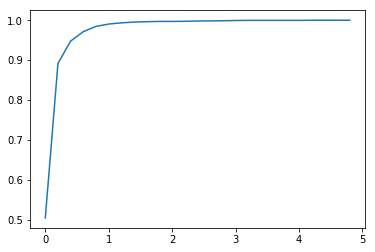

In [735]:
sns.lineplot(X, y)

---
Ok, so the x axis is the radius in miles, and the y axis is the proportion of restaurants that have at least one other restaurant x miles away. So, KNN may be able to pick up on geographic trends on the restaurants that have many nearby restaurants (and we can see that about 90% of restaurants have another restaurant within ~0.2 miles), but will likely not be able to pick up on trends for more isolated restaurants (i.e. the restaurants that don't have another restaurant within a mile).
<br>

Now let's look at how the scores are distributed, and start building our KNN regressor

---

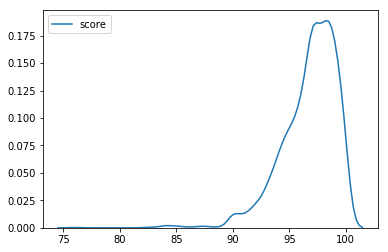

In [736]:
sns.kdeplot(data['score'])

---
Ok, let's try to build a simple KNN regressor using sklearn

---

In [761]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
model = KNeighborsRegressor(n_neighbors=10)
X_tr, X_ts, y_tr, y_ts = train_test_split(data[['x', 'y']], data['score'])
model.fit(X_tr, y_tr)
preds = model.predict(X_ts)
print('STDV:', np.sqrt(np.mean(np.square(data['score'] - np.mean(data['score'])))))
print('RMSE:', np.sqrt(np.mean(np.square(preds - y_ts))))

STDV: 2.4502068002772575
RMSE: 2.438992493469813


---
This root mean squared error is not good; it is only slightly better than the standard deviation, which means that it is basically predicting scores at random. Let's try using k neighbors but weighting closer restaurants to contribute more towards score.

---

In [762]:
model_dist = KNeighborsRegressor(n_neighbors=10, weights='distance')
model_dist.fit(X_tr, y_tr)
preds_dist = model_dist.predict(X_ts)
print('STDV:', np.sqrt(np.mean(np.square(data['score'] - np.mean(data['score'])))))
print('RMSE:', np.sqrt(np.mean(np.square(preds_dist - y_ts))))

STDV: 2.4502068002772575
RMSE: 2.525476879989579


---
Huh, that was actually worse. Ok, let's go back to our original model, and see how well it performed on the restaurants that have lower inspections scores (as these are more imnportant for the model to do well on).

---

In [764]:
lower_preds = pd.Series(preds, index=y_ts.index)
low_filter = y_ts[y_ts <= 90].index
lower_actual = y_ts[low_filter]
lower_preds = lower_preds[low_filter]
print('RMSE:', np.sqrt(np.mean(np.square(lower_preds - lower_actual))))

RMSE: 8.92786568639368


---
When we look at the restaurants with lower scores, the model does even worse. Inspections are perhaps most important for finding restaurants that do very poorly, as those restaurants are putting the public in the most danger and require fixing most urgently, so if our model doesn't predict those well, then it is basically useless.

---

In [765]:
# Only look at restaurants that have another restaurant within 0.1 miles
dense_filter = has_rest_within_x_miles(0.1, data)
print(np.mean(dense_filter))

0.8082101806239738


<a id='violation_category_prediction'></a>

## Violation Category Prediction
---
If you are still not convinced, let's try to predict the number of violations a restaurant will have. If we go back to the point of inspections, they are meant to make sure restaurants are keeping up to health and safety standards, and if they aren't, then they help the restaurant fix whatever it is that is not up to code. So, what is actually interesting are the types of violations a restaurant can have. Maybe we can predict those?

---

---
Let's start by exploring the violations data

---

In [766]:
viol_df.head()

,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN


---
Let's take a look at the different categories and the number of violations in each category

---

In [767]:
viol_df['category'].value_counts()

Physical Facilities                            38994
Utensils and Equipment                         35803
Potentially Hazardous Food Time/Temperature    20052
Protection from Contamination                  18493
Prevention of Food Contamination               15796
Proper Use of Utensils                         14040
Preventing Contamination by Hands              11082
Food Temperature Control                        7856
Supervision                                     6450
Employee Health                                 5979
Chemical                                        5579
Food Identification                             2904
Good Hygienic Practices                         2503
Consumer Advisory                               2155
Approved Source                                 1261
Safe Food and Water                              464
Conformance with Approved Procedures             374
Highly Susceptible Populations                    17
Name: category, dtype: int64

---
Ok, let's try to build a classifier that can predict how many violations of the top 7 types a certain restaurant will have. First, let's create a DataFrame containing each restaurant and how many violations of each type they have.

---

In [768]:
cats = viol_df['category'].value_counts().index.tolist()[:7]

In [769]:
rest_viols = {cat: [] for cat in cats}
rest_viols['hsisid'] = []
ids = viol_df['hsisid'].unique()
for hid in ids:
    rest_viols['hsisid'].append(hid)
    for cat in cats:
        rest_viols[cat].append((viol_df[(viol_df['hsisid'] == hid)]['category'] == cat).sum())
rest_viols = pd.DataFrame(rest_viols)

In [770]:
rest_viols

,Physical Facilities,Utensils and Equipment,Potentially Hazardous Food Time/Temperature,Protection from Contamination,Prevention of Food Contamination,Proper Use of Utensils,Preventing Contamination by Hands,hsisid
0,12,15,13,6,6,6,1,4092015279
1,16,11,12,16,7,8,9,4092014572
2,22,10,14,8,9,2,0,4092015906
3,38,31,17,11,12,14,0,4092013840
4,5,21,9,5,11,6,1,4092021788
...,...,...,...,...,...,...,...,...
4265,0,0,1,0,0,0,0,4092030302
4266,0,0,1,0,0,0,0,4092016399
4267,0,0,0,0,0,0,1,4092030285
4268,0,0,0,1,0,0,1,4092017190


---
Now let's merge it with the geographic data to try to predict these values with K Nearest Neighbors

---

In [771]:
rest_viols = rest_viols.merge(rest_df[['hsisid', 'x', 'y']], on='hsisid')

In [772]:
for cat in cats:
    print('Model for ' + cat)
    model = KNeighborsRegressor(n_neighbors=10)
    X_tr, X_ts, y_tr, y_ts = train_test_split(rest_viols[['x', 'y']], rest_viols[cat])
    model.fit(X_tr, y_tr)
    preds = model.predict(X_ts)
    print('STDV:', np.sqrt(np.mean(np.square(rest_viols[cat] - np.mean(rest_viols[cat])))))
    print('RMSE:', np.sqrt(np.mean(np.square(preds - y_ts))))
    print('-' * 80)

Model for Physical Facilities
STDV: 8.891230385824466
RMSE: 8.677617040409196
--------------------------------------------------------------------------------
Model for Utensils and Equipment
STDV: 7.3258987196666165
RMSE: 7.027898868082832
--------------------------------------------------------------------------------
Model for Potentially Hazardous Food Time/Temperature
STDV: 5.5204788833701715
RMSE: 5.488952541241358
--------------------------------------------------------------------------------
Model for Protection from Contamination
STDV: 4.872665753608473
RMSE: 4.603358828073258
--------------------------------------------------------------------------------
Model for Prevention of Food Contamination
STDV: 3.9436310487855843
RMSE: 3.8155389527562154
--------------------------------------------------------------------------------
Model for Proper Use of Utensils
STDV: 3.7135264783940767
RMSE: 3.723947837980547
---------------------------------------------------------------------

---
As seen here, KNN is not able to predict the categories of violations either. This tells us that neighboring restaurants are not able to predict the scores or categories of violations of other nearby restaurants.

---

---
Ok, so it seems that KNN is not able to pick up on anything about certain areas that may make restaurants more or less likely to have a higher inspection score. As a sanity check, let's check out the zip code data and the average inspection score to make sure there is no correlation.

---

In [773]:
insp_score = []
for zipcode in zip_df['zip']:
    insp_score.append(np.mean(insp_df[insp_df['postalcode'] == zipcode]['score'].dropna()))
zip_df['average_score'] = insp_score

---
Okay, now let's calculate the correlation between the `per_capita_income_dollars` and the `average_score`.

---

In [774]:
from scipy.stats import pearsonr
dropped = zip_df.dropna(subset=['per_capita_income_dollars', 'average_score'])
corr, _ = pearsonr(dropped['per_capita_income_dollars'], dropped['average_score'])
print(corr)

-0.005612426433360226


---
As we expected, the correlation between average inspection score and income is almost 0, so the inspection score is independent of the location (at least at a zip code level) in Wake County.

---

# Ethics & Privacy

So we saw that K Nearest Neighbors was an ineffective predictor of restaurant inspection scores. You may have many ideas on how to improve this model; maybe use a different type of model? Add different features? Before considering how to improve this machine learning algorithm to better predict inspection scores, it is much more important to consider the ethics of doing so.
<br>

Should we being doing this in the first place? Does a restaurant want their inspection score to be the result of neighboring restaurants? If a new restaurant is next to a competitor, and one of the ways they are trying to compete is by being more modern, safer, and healthier, does it make sense to use their competitor to predict that restaurant's inspection score? Probably not.
<br>

However, that is not to say that Machine Learning is dumb and should be snapped by Thanos out of existence. It could still be useful. For example, what if we had up-to-date data showing restaurants most recent hires. Could we then use that data to inform whether that restaurant is more likely to have a `Contamination by Hands`, `Proper Use of Utensils`, or `Protection from Contamination` violation? If we are able to predict this, maybe we could guide inspectors towards those restaurants with more recent hires, in order to make sure they are effectively training their employees on important health standards.
<br>

However, with this comes a major privacy concern: if inspectors are able to see recent hires, will that make restaurants more reluctant to hire new employees? Will it put new employees at higher risk of being fired, if they make a few mistakes? The point of having inspectors should not be to help restaurants fire their underperforming staff, but to help restaurants train them better, and make sure everyone understands standard health guidelines. In using ML to guide inspections, privacy and ethics should be the foremost concern. Even if it could be used effectively, the individual lives of restaurant employees as well as the customers would need to come first, in order to avoid unknowingly discriminating against different groups of people (like new hires).

# Conclusion & Discussion

By training a nearest neighbors regressor on geographic data, I expected it would be possible for nearest neighbors to pick up on certain trends in areas; I was thinking that certain disadvantaged areas with lower average income or funding would have restaurants that have lower inspection scores, and high income areas may have restaurants with higher inspection scores, due to resources available to them that may not be available to lower income areas. However, it seems there is not a trend between neighborhood/geographic location and health inspection scores. From the results of this project, I conclude that health inspection scores in Wake County, NC are independent of location and are completely dependent on the restaurant and its employees.
<br>

This is actually relatively comforting, I don't think disadvantaged areas should morally have less safe or less healthy restaurants, so the fact that restaurants' inspection scores are independent of zip code supports the argument that the Wake County government is doing its job. In other words, the Wake County inspections in no way discriminate against lower income areas and are generally fair in that sense. 